In this assignment, you will research people’s attitudes toward housing market with data from twitter.

**1. Download 200 tweets by searching with these conditions, ‘housing market’ in All of these words, 5 Minimum likes, posted in 2022. Save it to a DataFrame. 5 points**

In [1]:
import snscrape.modules.twitter as sntwitter
import pandas as pd
query = "housing market min_faves:5 until:2022-11-12 since:2022-01-01"
tweets = []
limit = 200

for tweet in sntwitter.TwitterSearchScraper(query).get_items():
    if len(tweets) == limit:
        break
    else:
        tweets.append([tweet.date, tweet.user.username, tweet.content, tweet.retweetCount])
        
df = pd.DataFrame(tweets, columns=['Date', 'User', 'Tweet', 'RetweetCount'])
print(df.shape)
df.head(5)

(200, 4)


,Date,User,Tweet,RetweetCount
0,2022-11-11 23:52:26+00:00,steveconaway1,Housing market is slow: Listed a property of m...,0
1,2022-11-11 23:49:31+00:00,amibiswasmd,@justlynnagain @durbinwatson09 @IwriteOK yeah ...,5
2,2022-11-11 22:31:23+00:00,shawncbrown,@fo2zie @anon_opin “It would collapse” - so yo...,0
3,2022-11-11 22:07:49+00:00,StevenJayGabe,@thisisnefertiti You got a bargain in today's ...,0
4,2022-11-11 21:54:47+00:00,doublespeak152,@JustinWolfers “If we can get the Fed to destr...,0


**2. Find the top 5 retweeted tweets. 5 points**

In [2]:
df.nlargest(5, 'RetweetCount')

,Date,User,Tweet,RetweetCount
174,2022-11-10 19:00:13+00:00,theashrb,War &gt;&gt;&gt;&gt;&gt; the UK housing market...,1917
187,2022-11-10 18:08:52+00:00,JPBWFarm,Adverts like this should concern us all. Takin...,54
74,2022-11-11 12:32:00+00:00,financialjuice,"US TREASURY SECRETARY YELLEN: HOUSING, RENT CO...",52
71,2022-11-11 13:04:57+00:00,johnburnsjbrec,More than 1000 RE agents tell us which way hom...,50
126,2022-11-10 23:59:38+00:00,MichaelKantro,What a difference a month makes! Went from 91 ...,36


**3. Use regular expression to find the top cited websites in these tweets. 10 points**

- Note: the result will be shown as shortened links. Use the code below to restore them.

In [3]:
import re
import requests
import nltk
from nltk import FreqDist

tweet_list = df['Tweet']
all_tweets = []
for tweet in tweet_list:
    all_tweets.append(tweet)
tweet_words = " ".join(all_tweets)
regex = r'https?://\S+'
websites = re.findall(regex, tweet_words)
links = []
for i in range(1, len(websites)):
    resp = requests.head(websites[i])
    links.append(resp.headers["Location"])
fdist = FreqDist(links)
for key,value in fdist.items():
    print(key, ':', value)

https://www.newstatesman.com/economy/2022/11/britains-big-squeeze : 2
https://twitter.com/NewStatesman/status/1591183233273798678/video/1 : 1
https://twitter.com/MattHaneySF/status/1591179099292438528/photo/1 : 1
https://twitter.com/Josephc64112551/status/1591177715847434241/photo/1 : 1
https://read.chartr.co/newsletters/2022/11/11/flipping-hard : 1
https://twitter.com/scottlincicome/status/1591171211127652491/photo/1 : 1
https://twitter.com/kryssylareina/status/1591078412013416449 : 1
https://twitter.com/FPVaughanIII/status/1591166641626558464/photo/1 : 1
https://dlvr.it/ScdDTx : 1
https://twitter.com/NewStatesman/status/1591137934903857152/video/1 : 1
https://twitter.com/MortimerleePaul/status/1591125503607394304 : 1
https://twitter.com/CWhitzman/status/1591108259657961472 : 1
https://twitter.com/donojazz62220/status/1591108791260807169/photo/1 : 1
https://www.theglobeandmail.com/opinion/article-governments-across-canada-need-common-income-based-definition-of/?utm_medium=Referrer:+So

**4. What are the essential data cleaning steps when dealing with textual data? Describe the purpose of each step. 10 points**

1. **Tokenization**: breaking sentences into individual words; returns an array of every word in the sentence
2. **Removing Punctuations**: removes the punctuations from the word array returned from tokenization
3. **Removing Stopwords**: removes common linking words from sentences (these are words that are repeated a lot), such as "the"
4. **Stemming/Lemmatization**: cleans up the array of words from words that are different but has the same meaning or are version of the same word

**5. Follow these data cleaning steps to process the tweet data.  20 points**

In [4]:
# tokenization
nltk.download('punkt')
from nltk.tokenize import word_tokenize
tweet_tokens = word_tokenize(tweet_words)
print(tweet_tokens)
print(len(tweet_words))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mcken\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['Housing', 'market', 'is', 'slow', ':', 'Listed', 'a', 'property', 'of', 'my', 'own', 'for', 'sale', '.', 'Single', 'family', 'home', 'located', 'in', 'a', 'nice', 'quiet', 'part', 'of', 'town', '.', '5', 'comparable', 'sales', 'in', 'hand', 'as', 'evidence', 'it', '’', 's', 'priced', 'in', 'the', 'medium', 'to', 'low', 'range', '.', 'Would', '’', 've', 'sold', 'within', 'a', 'week', 'last', 'year', '.', 'Zero', 'contacts', 'since', 'listing', 'a', 'month', 'ago', '@', 'justlynnagain', '@', 'durbinwatson09', '@', 'IwriteOK', 'yeah', 'man', '-', 'as', 'a', 'doctor', 'and', 'a', 'business', 'person', 'I', 'totally', 'agree', '.', 'Markets', 'do', "n't", 'work', 'for', 'social', 'goods', ',', 'ie', 'stuff', 'everybody', 'needs', ',', 'like', 'education', ',', 'housing', ',', 'health', 'care', ',', 'firefighters', ',', 'roads', ',', 'list', 'goes', 'on', 'and', 'on', '.', '@', 'fo2zie', '@', 'anon_opin', '“', 'It', 'would', 'collapse', '”', '-', 'so', 'you', 'admit', 'that', 'landlords', 

In [5]:
# removing punctuation
tweet_tokens = [re.sub(r'[^A-Za-z0-9]+', '', x) for x in tweet_tokens]
tweets_nopunc = []
for word in tweet_tokens:
    if word != '':
        tweets_nopunc.append(word)
print(tweets_nopunc)
print(len(tweets_nopunc)) # compare w/ size of list before removing punctuation (x>40,000)

['Housing', 'market', 'is', 'slow', 'Listed', 'a', 'property', 'of', 'my', 'own', 'for', 'sale', 'Single', 'family', 'home', 'located', 'in', 'a', 'nice', 'quiet', 'part', 'of', 'town', '5', 'comparable', 'sales', 'in', 'hand', 'as', 'evidence', 'it', 's', 'priced', 'in', 'the', 'medium', 'to', 'low', 'range', 'Would', 've', 'sold', 'within', 'a', 'week', 'last', 'year', 'Zero', 'contacts', 'since', 'listing', 'a', 'month', 'ago', 'justlynnagain', 'durbinwatson09', 'IwriteOK', 'yeah', 'man', 'as', 'a', 'doctor', 'and', 'a', 'business', 'person', 'I', 'totally', 'agree', 'Markets', 'do', 'nt', 'work', 'for', 'social', 'goods', 'ie', 'stuff', 'everybody', 'needs', 'like', 'education', 'housing', 'health', 'care', 'firefighters', 'roads', 'list', 'goes', 'on', 'and', 'on', 'fo2zie', 'anonopin', 'It', 'would', 'collapse', 'so', 'you', 'admit', 'that', 'landlords', 'are', 'the', 'reason', 'for', 'high', 'prices', 'Can', 'you', 'not', 'see', 'that', 's', 'why', 'they', 're', 'hated', 'If', '

In [6]:
# removing stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = set(stopwords.words("english"))
tweets_nostop = []

for tweet in tweets_nopunc:
    if tweet.casefold() not in stopwords:
        tweets_nostop.append(tweet)
print(tweets_nostop)
print(len(tweets_nostop))

['Housing', 'market', 'slow', 'Listed', 'property', 'sale', 'Single', 'family', 'home', 'located', 'nice', 'quiet', 'part', 'town', '5', 'comparable', 'sales', 'hand', 'evidence', 'priced', 'medium', 'low', 'range', 'Would', 'sold', 'within', 'week', 'last', 'year', 'Zero', 'contacts', 'since', 'listing', 'month', 'ago', 'justlynnagain', 'durbinwatson09', 'IwriteOK', 'yeah', 'man', 'doctor', 'business', 'person', 'totally', 'agree', 'Markets', 'nt', 'work', 'social', 'goods', 'ie', 'stuff', 'everybody', 'needs', 'like', 'education', 'housing', 'health', 'care', 'firefighters', 'roads', 'list', 'goes', 'fo2zie', 'anonopin', 'would', 'collapse', 'admit', 'landlords', 'reason', 'high', 'prices', 'see', 'hated', 'never', 'exists', 'market', 'need', 'collapse', 'would', 'already', 'cheaper', 'EVERYONE', 'pay', 'housing', 'costs', 'thisisnefertiti', 'got', 'bargain', 'today', 'corrupt', 'housing', 'market', 'first', 'APT', 'NYC', '213month', 'cosign', 'upper', 'West', 'Side', '1980', 'small'

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mcken\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
# stemming
from nltk.stem.snowball import SnowballStemmer
s_stemmer = SnowballStemmer(language='english')
sample = ['house', 'housing', 'home']
the_words = []

for word in sample:
    the_words.append(s_stemmer.stem(word))

tweets_norepeat = []
for tweet in tweets_nostop:
    tweets_norepeat.append(s_stemmer.stem(tweet))
print(tweets_norepeat)
print(len(tweets_norepeat))

['hous', 'market', 'slow', 'list', 'properti', 'sale', 'singl', 'famili', 'home', 'locat', 'nice', 'quiet', 'part', 'town', '5', 'compar', 'sale', 'hand', 'evid', 'price', 'medium', 'low', 'rang', 'would', 'sold', 'within', 'week', 'last', 'year', 'zero', 'contact', 'sinc', 'list', 'month', 'ago', 'justlynnagain', 'durbinwatson09', 'iwriteok', 'yeah', 'man', 'doctor', 'busi', 'person', 'total', 'agre', 'market', 'nt', 'work', 'social', 'good', 'ie', 'stuff', 'everybodi', 'need', 'like', 'educ', 'hous', 'health', 'care', 'firefight', 'road', 'list', 'goe', 'fo2zi', 'anonopin', 'would', 'collaps', 'admit', 'landlord', 'reason', 'high', 'price', 'see', 'hate', 'never', 'exist', 'market', 'need', 'collaps', 'would', 'alreadi', 'cheaper', 'everyon', 'pay', 'hous', 'cost', 'thisisnefert', 'got', 'bargain', 'today', 'corrupt', 'hous', 'market', 'first', 'apt', 'nyc', '213month', 'cosign', 'upper', 'west', 'side', '1980', 'small', 'studio', 'last', 'willi', 'bklyn', 'entir', 'floor', 'view', '

In [8]:
print("Before: Full Tweets into Senteces")
print(len(tweet_words))
print("\n")

print("Step 1: Tokenization - Sentences into Individual Words")
print(len(tweet_words))
print("\n")

print("Step 2: Removing Punctuations")
print(len(tweets_nopunc))
print("\n")

print("Step 3: Removing Stopwords")
print(len(tweets_nostop))
print("\n")

print("Step 4: Stemming")
print(len(tweets_norepeat))
print("\n")

Before: Full Tweets into Senteces
42100


Step 1: Tokenization - Sentences into Individual Words
42100


Step 2: Removing Punctuations
6720


Step 3: Removing Stopwords
4134


Step 4: Stemming
4134




**6. Find the top 20 words that were used in these tweets about housing market. Excluding words such as housing, home, and price.  Create a horizontal bar plot to show these top 20 words. 10 points**

In [9]:
fdist2 = FreqDist(tweets_norepeat)
df_freqwords = pd.DataFrame(list(fdist2.items()), columns = ["Word", "Frequency"])
df_freqwords = df_freqwords[df_freqwords.Word != 'housing']
df_freqwords = df_freqwords[df_freqwords.Word != 'home']        
df_freqwords = df_freqwords[df_freqwords.Word != 'price']        
df_sort = df_freqwords.sort_values(by=['Frequency'], ascending=False)
df_sort.head(20)

,Word,Frequency
0,hous,233
1,market,204
119,https,102
164,rate,27
126,afford,22
27,year,22
172,stock,21
43,nt,21
210,peopl,21
128,rent,20


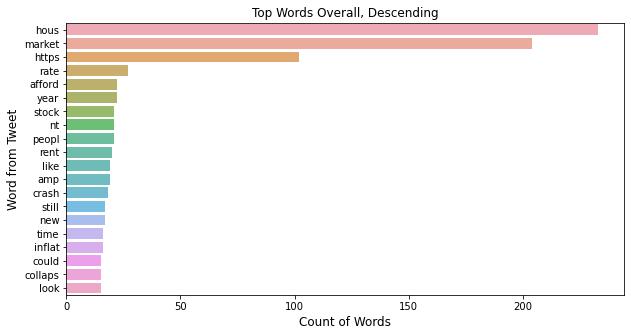

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.barplot(x=df_sort.iloc[0:20, 1], y=df_sort.iloc[0:20, 0], alpha=0.8)
plt.title('Top Words Overall, Descending')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()

**7. Use Named Entity Recognition to find what organizations people mentioned in their tweets. Find the top 3 mentioned organizations.  20 points**

In [11]:
import spacy
from spacy import displacy
import en_core_web_sm

new_tweets = re.sub(r'[^A-Za-z0-9 ]+', ' ', tweet_words) 
EntityR = en_core_web_sm.load() 
result = EntityR(new_tweets)
label_list = [(X.text, X.label_) for X in result.ents]
df_entity = pd.DataFrame(label_list, columns = ['Word','Entity'])
df_persons = df_entity.where(df_entity['Entity'] == 'PERSON')
df_persons['Word'].value_counts()[0:3]

C:\Users\mcken\anaconda3\lib\site-packages\spacy\language.py:1895: UserWarning: [W123] Argument disable with value [] is used instead of ['senter'] as specified in the config. Be aware that this might affect other components in your pipeline.
  warnings.warn(


https          4
Learn          2
Read Duncan    2
Name: Word, dtype: int64

**8. Use sentiment analysis to find people’s attitudes towards housing prices. What percentage of these tweets are negative? What percentage are positive? And What percentage are neutural? Plot this result on the pie chart. 20 points**

In [13]:
from textblob import TextBlob
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return  TextBlob(text).sentiment.polarity

df['Subjectivity'] = df['Tweet'].apply(getSubjectivity)
df['Polarity'] = df['Tweet'].apply(getPolarity)

df.head(5)

,Date,User,Tweet,RetweetCount,Subjectivity,Polarity
0,2022-11-11 23:52:26+00:00,steveconaway1,Housing market is slow: Listed a property of m...,0,0.473469,0.118367
1,2022-11-11 23:49:31+00:00,amibiswasmd,@justlynnagain @durbinwatson09 @IwriteOK yeah ...,5,0.408333,0.016667
2,2022-11-11 22:31:23+00:00,shawncbrown,@fo2zie @anon_opin “It would collapse” - so yo...,0,0.620000,-0.370000
3,2022-11-11 22:07:49+00:00,StevenJayGabe,@thisisnefertiti You got a bargain in today's ...,0,0.489286,0.014286
4,2022-11-11 21:54:47+00:00,doublespeak152,@JustinWolfers “If we can get the Fed to destr...,0,0.383333,-0.066667


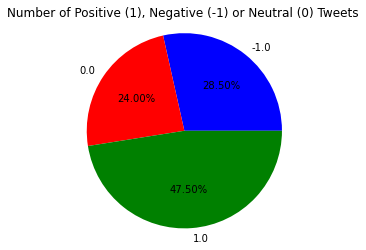

In [27]:
# polarity pie chart - does not need to do sub. since it is ranking fact vs opinion
# use condition to see what polarity scores are x < 0, x > 0 and x = 0 for pos., neg. and neutral
# then use this data to make the pie chart
colors = ["Blue", "Red", "Green"]
df.loc[df['Polarity'] > 0] = 1
df.loc[df['Polarity'] < 0] = -1
df.loc[df['Polarity'] == 0] = 0
ax=df.groupby('Polarity').size().plot(kind='pie', autopct='%1.2f%%', colors=colors)
ax.set_ylabel('')
plt.title("Number of Positive (1), Negative (-1) or Neutral (0) Tweets")
plt.axis('equal')
plt.show()